### Deep Learning Notes 3
- *Автор*: Зитцер Данил
- *Дата*: понедельник, 1 февраля 2021 г., 10:31:04
- *Описание*: Поговорим об устройстве искуственных нейронов и функциях активации.
- *План блокнота*:
    1. Математическая модель нейрона
        - биологический нейрон
        - модель нейрона
    2. Решение задачи регрессии из второго митапа
        - с помощью Numpy
        - с помощью Keras
    3. Функции активации
        - аппроксимация линейной функции
        - аппроксимация нелинейной функции
        - усложнение базовой модели
        - добавление функции активации
- *Полезные ссылки*:
    - [Нейронные сети в картинках](https://habr.com/ru/post/322438/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 20

### Математическая модель нейрона

[Изучение нейронов мозга](https://youtu.be/siSto0tUoyM?t=390)

Вот так выглядит биологический нейрон головного мозга.

![](./../pics/01_biological_neuron.png)

Выстроенные связи между нейронами.

![](./../pics/02_complex_communication_systems.png)

[Рост отростков одного нейрона](https://youtu.be/4Gd92o4OTu0)

[Установление связей между нейронами](https://imgur.com/k90YFSM)

Устройство модели нейрона в сравнении с биологическим.

![](https://static.packt-cdn.com/products/9781788830645/graphics/ff29311c-b8a5-44cb-9823-92c9c8475829.png)

$$ \large y(x) = wx + b - \text{лин. ф-ия или взвешенная сумма} $$

$$ \large y(x_1, x_2, \cdots, x_n) = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b - \text{лин. ф-ия нескольких переменных} $$

#### Построение модели нейрона

Пусть у нас есть два входных признака $x_1$ и $x_2$, а также соответствующие веса $w_1$ и $w_2$ и, обязательно, смещение $b$.

In [2]:
x1, x2 = 10, 20
w1, w2, b = 0.1, 0.9, 2

Вот такой математической операцией можно представить простейшую нейронную сеть с одним нейроном.

In [3]:
x1*w1 + x2*w2 + b

21.0

$$ \large x_i - \text{признаки одного образца}$$
$$ \large w_i - \text{веса нейрона соответствующих признаков}$$

$$ \large neuron = w_1x_1 + w_2x_2 + b = \sum_{i}w_ix_i + b$$

Чтобы сделать запись более короткой можно добавить константный признак $x_3$ всегда равный 1. Тогда вес $w_3$ будет выполнять роль $b$.

In [4]:
x1, x2, x3 = 10, 20, 1
w1, w2, w3 = 0.1, 0.9, 2

In [5]:
x1*w1 + x2*w2 + x3*w3

21.0

$$ \large neuron = w_1x_1 + w_2x_2 + w_3\cdot1 = \sum_{i}w_ix_i$$

![](https://www.researchgate.net/profile/Soojun-Kim/publication/263631724/figure/fig1/AS:671522331033609@1537114808363/Biological-neuron-and-Artificial-neural-network.png)

Будем реализовывать нейронную сеть как функцию.

Входные данные

In [6]:
x1, x2, x3 = 5.0, 9.0, 1.0
w1, w2, w3 = 0.5, 0.9, 0.1

Версия 1

In [7]:
def neuron(x1: float, x2: float, x3: float, w1: float, w2: float, w3: float) -> float:
    return x1*w1 + x2*w2 + x3*w3

neuron(x1, x2, x3, w1, w2, w3)

10.7

Версия 2

In [8]:
def neuron(x: list, w: list):
    assert len(x) == len(w), 'len(x) must be equal len(w)'
    return sum([xi * wi for xi, wi in zip(x, w)])

neuron(x=[x1, x2, x3], w=[w1, w2, w3])

10.7

Можно заметить, что версия 2 очень похожа на операцию матричного умножения.

![](https://www.mathwarehouse.com/algebra/matrix/images/matrix-multiplication/how-to-multiply-2-matrices-demo.gif)

Версия 3

Через матричное умножение.

**Важно!** Чтобы количество столбцов в матрице признаков было равно количеству строк в матрице весов.

In [9]:
def neuron(x: np.ndarray, w: np.ndarray):
    assert x.shape[1] == w.shape[0], 'ncols(x) must be equal nrows(w)'
    return x @ w

neuron(np.array([[x1, x2, x3]]), np.array([[w1], [w2], [w3]]))

array([[10.7]])

![](https://miro.medium.com/max/13620/1*CJEBy3GCaGQKNx7PEy-w5w.jpeg)

Поупражняемся с представлением весов и матрицы входных признаков

1 нейрон

Поместим три признака в один массив

In [10]:
x = np.array([[x1, x2, x3]])

print(f'x = {x} and shape is {x.shape}')

x = [[5. 9. 1.]] and shape is (1, 3)


В матрице весов:
- столбцы - это веса одного нейрона для всех входных признаков
- строки - это все веса одного признака у всех нейронов

In [11]:
w = np.array([[w1], [w2], [w3]])

print(f'w = \n{w} and shape is {w.shape}')

w = 
[[0.5]
 [0.9]
 [0.1]] and shape is (3, 1)


In [12]:
neuron(x, w)

array([[10.7]])

3 нейрона

In [13]:
w = np.array([[w1, w1, w1], [w2, w2, w2], [w3, w3, w3]])

print(f'w = \n{w} and shape is {w.shape}')

w = 
[[0.5 0.5 0.5]
 [0.9 0.9 0.9]
 [0.1 0.1 0.1]] and shape is (3, 3)


In [14]:
neuron(x, w)

array([[10.7, 10.7, 10.7]])

Общий вид

In [15]:
nsamples = 10
nfeatures = 5

x = np.random.rand(nsamples, nfeatures)

print(f'x = \n{x} and shape is {x.shape}')

x = 
[[0.65436733 0.86896548 0.0671237  0.30621409 0.68950348]
 [0.12633716 0.87586754 0.49574404 0.61139727 0.39013548]
 [0.71609138 0.870705   0.81321377 0.67449652 0.9288854 ]
 [0.9586542  0.98841923 0.72735372 0.89137109 0.6019516 ]
 [0.53786457 0.43061781 0.92678993 0.75768874 0.27123259]
 [0.89098653 0.62471843 0.18016911 0.47629135 0.21649124]
 [0.15688306 0.29615931 0.93035562 0.87470163 0.37219793]
 [0.51008547 0.46669245 0.84320266 0.06740389 0.95416311]
 [0.97007361 0.68085915 0.26993721 0.60092974 0.54403344]
 [0.73058696 0.29597053 0.11436945 0.04244724 0.89835443]] and shape is (10, 5)


In [16]:
nneurons = 4

w = np.random.rand(nfeatures, nneurons)

print(f'w = \n{w} and shape is {w.shape}')

w = 
[[0.13410394 0.31780391 0.7291476  0.69748504]
 [0.51834914 0.78197598 0.68421522 0.01678115]
 [0.10857073 0.18038754 0.62966553 0.62825578]
 [0.33504974 0.38501388 0.74889824 0.70703784]
 [0.4322188  0.93770521 0.07729893 0.64383023]] and shape is (5, 4)


In [17]:
neuron(x, w)

array([[0.94608173, 1.66402658, 1.39657633, 1.17359266],
       [0.89824318, 1.41571238, 1.49158466, 1.09773244],
       [1.26312269, 2.18585186, 2.2068697 , 2.09991978],
       [1.27870334, 2.11643308, 2.5473579 , 2.15998569],
       [0.76705763, 1.22090649, 1.85878334, 1.67498225],
       [0.71602104, 1.19055782, 1.56397712, 1.22126518],
       [0.72950145, 1.13505628, 1.58667349, 1.55697421],
       [0.83685212, 1.59982784, 1.34641576, 1.55533173],
       [0.94880356, 1.63091127, 1.83523961, 1.63277229],
       [0.66631544, 1.34299046, 0.90845827, 1.19479302]])

### Задача регрессии

#### Постановка задачи

Вернёмся к исходной задаче

Есть 3 точки, хотим максимально близко провести прямую линию ко всем точкам сразу.

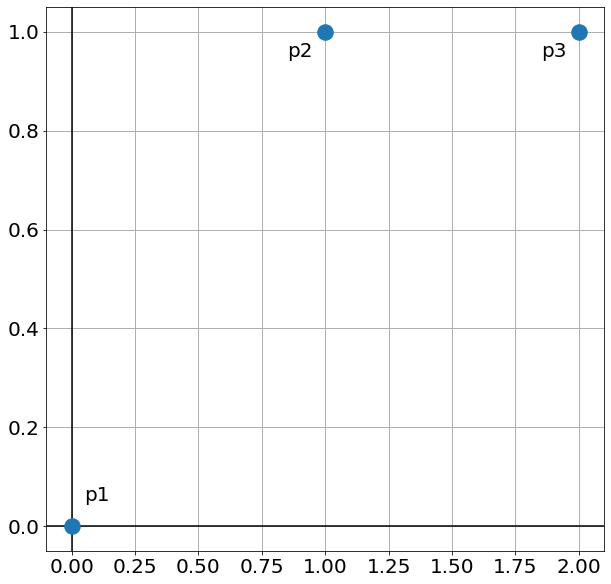

In [18]:
x = np.array([[0.], [1.], [2.]])
y = np.array([[0.], [1.], [1.]])

plt.scatter(x, y, marker='o', s=20*4*3, zorder=3)
plt.grid(linestyle='-', linewidth='1.0')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.annotate('p1', (0.05, 0.05))
plt.annotate('p2', (0.85, 0.95))
plt.annotate('p3', (1.85, 0.95))

plt.show()

In [19]:
pd.DataFrame(
    data=np.hstack([x, y]),
    index=[f'p{i+1}' for i in range(len(y))],
    columns=['x', 'y']
)

,x,y
p1,0.0,0.0
p2,1.0,1.0
p3,2.0,1.0


In [20]:
# добавим новый константный признак x2
x = np.hstack([x, [[1.], [1.], [1.]]])

pd.DataFrame(
    data=np.hstack([x, y]),
    index=[f'p{i+1}' for i in range(len(y))],
    columns=['x1', 'x2', 'y']
)

,x1,x2,y
p1,0.0,1.0,0.0
p2,1.0,1.0,1.0
p3,2.0,1.0,1.0


Сумма квадратов ошибок - это целевая функция, которую мы хотим минимизировать.

$$\Large distance = \sum \limits_{p_1, p_2, p_3} (y_{pred} - y_{true})^2 \to \min$$

Предсказания - это перемножение матрицы входных признаков на матрицу весов.

$$\Large y_{pred} = w@x$$

Теперь от суммы перейдём к средней ошибке (делим на три, потому что всего у нас 3 точки):

$$ \Large MSE = \frac{(w@x - y)^2}{3}$$

Возьмём градиент среднеквадратичной ошибки.

$$ \Large \nabla MSE(w) = \frac{2}{3} \cdot (w @ x - y) \cdot x$$

$$ \Large \nabla MSE(w) = \frac{2}{3} \cdot error \cdot x$$

Напомню как выглядит шаг градиентного спуска

$$ \Large w_{next} = w_{curr} - \alpha \nabla MSE(w_{curr}) $$

#### Реализация в Numpy

Реализуем целевую функцию:

In [21]:
def mean_square_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.square(y_true - y_pred))

Решение задачи (сбоку в комментариях указаны размерности на выходе)

In [22]:
w = np.array([[1.0], [1.0]])  # (2, 1)

learning_rate = 0.01
nepochs = 1000

for epoch in range(nepochs):
    # для каждой точки из набора данных
    for xi, yi in zip(x, y):
        xi = xi[None, :]  # (1, 2). Добавим новое измерение.
        
        prediction = neuron(xi, w)  # (1, 1)
        error = prediction - yi  # (1, 1)
        
        gradient = error*xi  # (1, 2) Здесь расчитывается градиент и можно откинуть коэффициент 2/3,
                             # потому что далее мы будем домножать на learning_rate и будем считать,
                             # что 2/3 входит в состав learning_rate
        gradient = gradient.T  # транспонируем градиент, то есть поменяем размерности местами (2, 1)
    
        w = w - learning_rate*gradient  # совершим шаг градиентного спуска
        
    print(mean_square_error(neuron(x, w), y))  # выведем значение целевой функции

print()
print(f'w1 = {w[0, 0]:.2f}, w2 = {w[1, 0]:.2f}')

1.7404311543716666
1.5160778022961832
1.3221525747988434
1.1545191158127783
1.0096035468562121
0.884317972679371
0.7759943902424716
0.6823275861181152
0.6013257998496303
0.5312680970617558
0.4706675397713144
0.41823936545893453
0.372873493695773
0.33361077176745724
0.2996224507848088
0.2701924529311461
0.24470205024985084
0.22261662700279464
0.20347424223546148
0.1868757477232393
0.17247624977043965
0.15997773210209004
0.14912268194432024
0.13968858286441752
0.1314831564961169
0.12434025130668395
0.11811629041304501
0.11268720242116291
0.10794576960224711
0.10379933665259085
0.10016783100208441
0.0969820523050124
0.0941821945083673
0.09171656887094472
0.08954050060750651
0.08761537554838006
0.08590781641555982
0.08438897109042483
0.08303389764497103
0.08182103297928572
0.0807317336971975
0.07974987939791606
0.0788615298971282
0.07805462904502902
0.0773187488058421
0.07664486812486608
0.07602518185341502
0.07545293564512885
0.07492228329278709
0.07442816345485168
0.07396619313577439
0.0

Достигли минимума, значение $w_1 = 0.5, w_2 = 0.17$. Таких же значений мы достигли в ходе второго митапа.

Теперь избавимся от вложенного цикла. То есть во время эпохи будем проходить по всем точкам за раз.

In [23]:
w = np.array([[1.0], [1.0]])  # (2, 1)

learning_rate = 0.01
nepochs = 2000

for epoch in range(nepochs):
    prediction = neuron(x, w)  # (3, 1)
    error = prediction - y  # (3, 1)
    
    gradient = error*x  # (3, 2) здесь расчитывается градиент
    gradient = gradient.mean(axis=0)  # (2, )
    gradient = gradient[:, None]  # (2, 1)
        
    w = w - learning_rate*gradient
    
    print(mean_square_error(neuron(x, w), y))

print()
print(f'w1 = {w[0, 0]:.2f}, w2 = {w[1, 0]:.2f}')

1.9099740740740738
1.8241859023045264
1.7424356068380444
1.6645327394694707
1.5902958367664475
1.5195519961826243
1.4521364721692105
1.3878922913413863
1.326669885800592
1.2683267437561265
1.212727076629897
1.1597415018666697
1.1092467407088666
1.0611253302298884
1.0152653489532801
0.9715601554167735
0.9299081390704863
0.8902124829273722
0.8523809374114676
0.8163256048756361
0.7819627342854454
0.7492125255895465
0.7179989433195691
0.6882495389840879
0.6598952818417764
0.6328703976584261
0.6071122150711669
0.5825610192009896
0.5591599121716079
0.5368546802088284
0.5155936670099698
0.49532765308751925
0.4760097408051724
0.4575952448376939
0.44004158779871777
0.42330820079266385
0.40735642865846317
0.39214943968373944
0.37765213957853305
0.3638310895076135
0.35065442798989865
0.33809179648253834
0.3261142684758242
0.31469428193329035
0.3038055749191845
0.29342312426293266
0.28352308711731783
0.2740827452738515
0.26508045210525616
0.2564955820111174
0.24830848224860871
0.24050042703576577


0.05560701257379185
0.05560672559707197
0.05560644022082645
0.05560615643612939
0.05560587423410467
0.05560559360592579
0.05560531454281528
0.05560503703604482
0.05560476107693461
0.05560448665685338
0.05560421376721785
0.05560394239949274
0.05560367254519036
0.055603404195870294
0.05560313734313924
0.05560287197865066
0.05560260809410466
0.05560234568124752
0.055602084731871615
0.05560182523781509
0.05560156719096162
0.05560131058324009
0.05560105540662447
0.055600801653133435
0.05560054931483022
0.05560029838382227
0.05560004885226109
0.05559980071234191
0.05559955395630356
0.05559930857642808
0.055599064565040594
0.055598821914509024
0.055598580617243896
0.05559834066569793
0.05559810205236604
0.05559786476978503
0.05559762881053328
0.055597394167230536
0.05559716083253772
0.0555969287991567
0.05559669805983005
0.055596468607340764
0.05559624043451217
0.05559601353420756
0.055595787899330035
0.05559556352282232
0.05559534039766644
0.05559511851688354
0.05559489787353381
0.0555946784

#### Реализация в Keras

$$ \large neuron = w_1x_1 + w_2x_2 + w_3\cdot1 = \sum_{i}w_ix_i$$

##### Без смещения внутри нейрона
Смещение в данных (тот самый константный признак равный 1)

In [24]:
# матрица входных признаков будут проходить последовательно (Keras Sequential API)
keras_linear_model = keras.models.Sequential()

keras_linear_model.add(
    keras.layers.InputLayer(input_shape=(2, ))
)
# полносвязный слой
keras_linear_model.add(
    keras.layers.Dense(
        units=1,  # один нейрон
        use_bias=False,  # без смещения 
        kernel_initializer=keras.initializers.constant(1.0),  # начальное значение равно 1.0
    )
)

keras_linear_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    loss='mse',    # целевая функция - среднеквадратичная ошибка
    metrics=['mse'],
)

In [25]:
keras_linear_model.get_weights()

[array([[1.],
        [1.]], dtype=float32)]

In [26]:
history = keras_linear_model.fit(x=x, y=y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 506ms/step - loss: 2.0000 - mse: 2.0000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.8221 - mse: 1.8221
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.6608 - mse: 1.6608
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5144 - mse: 1.5144
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.3817 - mse: 1.3817
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2613 - mse: 1.2613
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.1521 - mse: 1.1521
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0530 - mse: 1.0530
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.9632 - mse: 0.9632
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8817 - mse: 0.8817
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615
Epoch 175/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0614 - mse: 0.0614
Epoch 176/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0613 - mse: 0.0613
Epoch 177/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0613 - mse: 0.0613
Epoch 178/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mse: 0.0612
Epoch 179/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mse: 0.0612
Epoch 180/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mse: 0.0611
Epoch 181/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610
Epoch 182/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610
Epoch 183/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0609 - mse: 0.0609
Epoch 184/1000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 347/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 348/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 349/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 351/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 352/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 353/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 354/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563 - mse: 0.0563
Epoch 355/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563 - mse: 0.0563
Epoch 356/1000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 519/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0557 - mse: 0.0557
Epoch 520/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mse: 0.0557
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 522/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 523/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 524/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 525/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 526/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mse: 0.0557
Epoch 527/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mse: 0.0557
Epoch 528/1000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 691/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 692/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 693/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 694/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 695/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 696/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 697/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 698/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 699/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 700/1000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 863/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 864/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 865/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 866/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 867/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 868/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 869/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 870/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 871/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 872/1000
1/1 [==============================] - 0s 1ms/step

Text(0, 0.5, 'MSE')

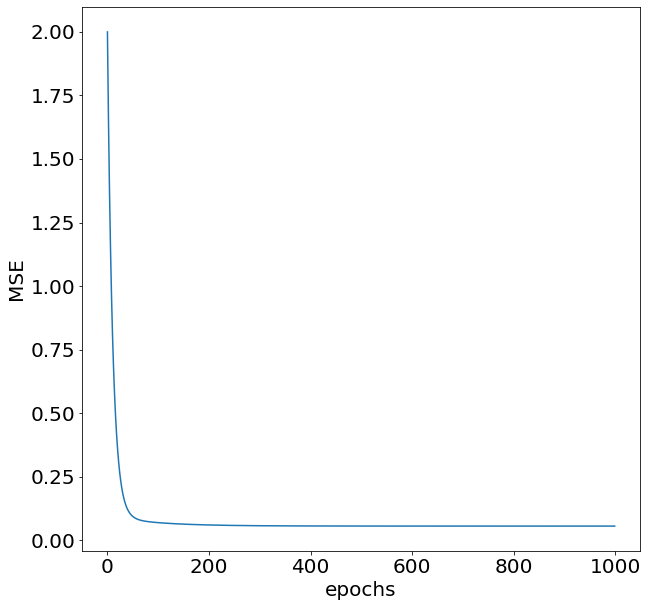

In [27]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

In [28]:
keras_linear_model.get_weights()

[array([[0.49917084],
        [0.1678171 ]], dtype=float32)]

Получили правильный ответ: $w_1 = 0.5, w_2 = 0.17$.

##### Смещение внутри нейрона
Константный признак из данных мы выкинем

In [29]:
keras_linear_model = keras.models.Sequential()

keras_linear_model.add(
    keras.layers.InputLayer(input_shape=(1, ))
)
# то же самое, что и выше, но use_bias=True
keras_linear_model.add(
    keras.layers.Dense(
        units=1,
        use_bias=True,
        kernel_initializer=keras.initializers.constant(1.0),
        bias_initializer=keras.initializers.constant(1.0),
    )
)

keras_linear_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    loss='mse',
    metrics=['mse'],
)

In [30]:
keras_linear_model.get_weights()

[array([[1.]], dtype=float32), array([1.], dtype=float32)]

In [31]:
history = keras_linear_model.fit(x=x[:, 0], y=y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 106ms/step - loss: 2.0000 - mse: 2.0000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.8221 - mse: 1.8221
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6608 - mse: 1.6608
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5144 - mse: 1.5144
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.3817 - mse: 1.3817
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.2613 - mse: 1.2613
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.1521 - mse: 1.1521
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0530 - mse: 1.0530
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.9632 - mse: 0.9632
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.8817 - mse: 0.8817
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 2ms/step - loss: 0.0615 - mse: 0.0615
Epoch 175/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0614 - mse: 0.0614
Epoch 176/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0613 - mse: 0.0613
Epoch 177/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0613 - mse: 0.0613
Epoch 178/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0612 - mse: 0.0612
Epoch 179/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mse: 0.0612
Epoch 180/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mse: 0.0611
Epoch 181/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610
Epoch 182/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610
Epoch 183/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0609 - mse: 0.0609
Epoch 184/1000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 347/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 348/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 349/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0564 - mse: 0.0564
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 351/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 352/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 353/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0564 - mse: 0.0564
Epoch 354/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0563 - mse: 0.0563
Epoch 355/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563 - mse: 0.0563
Epoch 356/1000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 519/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mse: 0.0557
Epoch 520/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mse: 0.0557
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 522/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 523/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 524/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 525/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 526/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 527/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557
Epoch 528/1000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 691/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 692/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 693/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 694/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 695/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 696/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 697/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 698/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 699/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 700/1000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 863/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 864/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 865/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 866/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 867/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 868/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 869/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 870/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0556 - mse: 0.0556
Epoch 871/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0556 - mse: 0.0556
Epoch 872/1000
1/1 [==============================] - 0s 2ms/step

In [32]:
keras_linear_model.get_weights()

[array([[0.49917084]], dtype=float32), array([0.1678171], dtype=float32)]

Получили правильный ответ: $w_1 = 0.5, w_2 = 0.17$.

### Функции активации

![](https://www.researchgate.net/profile/Soojun-Kim/publication/263631724/figure/fig1/AS:671522331033609@1537114808363/Biological-neuron-and-Artificial-neural-network.png)

Обратите внимание, что на схеме после взвешенной суммы идёт нелинейный элемент, то есть функция активации.

В её предназначении мы будем сейчас разбираться.

[ANN activation function](https://www.google.com/search?q=artificial+neuron&newwindow=1&client=ubuntu&hs=DPT&channel=fs&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiB1OXa7d7uAhUjiIsKHbgiB4gQ_AUoAXoECB4QAw&biw=1920&bih=900)

#### Аппроксимация прямой

[Визуализация уравнения прямой](https://www.desmos.com/calculator/wqlnokf03o)

Пусть имеем дело с функцией:

$$ \Large y_{true}(x) = 2x + 1 $$

Возьмём 16 точек на этой прямой.

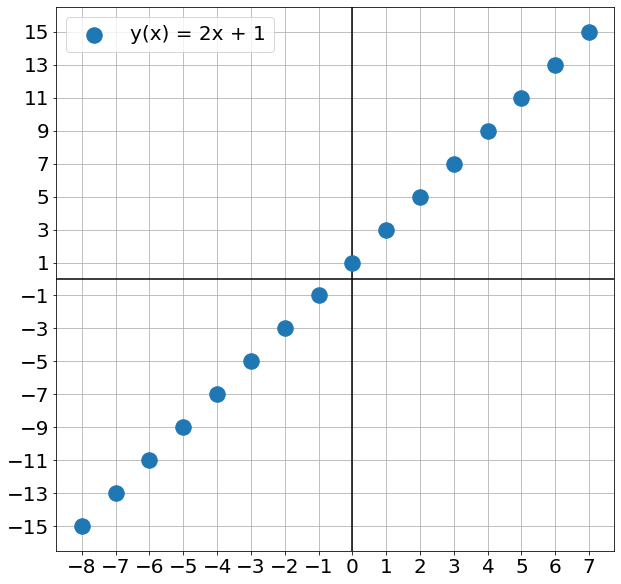

In [33]:
def some_linear_function(x):
    return 2*x + 1

some_linear_function = np.vectorize(some_linear_function)

x = np.arange(-8, 8, 1)
y = some_linear_function(x)

plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y(x) = 2x + 1')
plt.xticks(x)
plt.yticks(y)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

Попробуем с помощью нейронной сети провести прямую линию максимально близко лежащую ко всем 16 точкам.

![](https://hsto.org/files/6e8/181/7ce/6e81817ce6bc4452ab1dd3ff9b74ec77.png)

Строим модель.

In [34]:
def baseline_model():
    model = keras.models.Sequential()
    
    model.add(keras.layers.InputLayer(input_shape=(1, ), name='input_layer'))
    model.add(keras.layers.Dense(units=1, name='dense_layer'))
    
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
        loss='mse',
        metrics=['mse']
    )
    
    return model

In [35]:
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Схема модели:

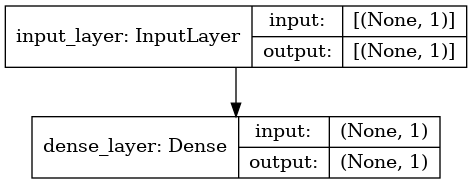

In [36]:
keras.utils.plot_model(model=model, show_shapes=True)

In [37]:
# обучаем
history = model.fit(x=x, y=y, batch_size=16, epochs=128)

Epoch 1/128
1/1 [==============================] - 0s 94ms/step - loss: 218.3086 - mse: 218.3086
Epoch 2/128
1/1 [==============================] - 0s 2ms/step - loss: 71.5978 - mse: 71.5978
Epoch 3/128
1/1 [==============================] - 0s 2ms/step - loss: 23.9437 - mse: 23.9437
Epoch 4/128
1/1 [==============================] - 0s 1ms/step - loss: 8.4467 - mse: 8.4467
Epoch 5/128
1/1 [==============================] - 0s 1ms/step - loss: 3.3896 - mse: 3.3896
Epoch 6/128
1/1 [==============================] - 0s 1ms/step - loss: 1.7227 - mse: 1.7227
Epoch 7/128
1/1 [==============================] - 0s 2ms/step - loss: 1.1572 - mse: 1.1572
Epoch 8/128
1/1 [==============================] - 0s 1ms/step - loss: 0.9502 - mse: 0.9502
Epoch 9/128
1/1 [==============================] - 0s 1ms/step - loss: 0.8606 - mse: 0.8606
Epoch 10/128
1/1 [==============================] - 0s 1ms/step - loss: 0.8099 - mse: 0.8099
Epoch 11/128
1/1 [==============================] - 0s 1ms/step - loss

Epoch 89/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mse: 0.0342
Epoch 90/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mse: 0.0329
Epoch 91/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0316 - mse: 0.0316
Epoch 92/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0304 - mse: 0.0304
Epoch 93/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0292 - mse: 0.0292
Epoch 94/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0280 - mse: 0.0280
Epoch 95/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0269 - mse: 0.0269
Epoch 96/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0259 - mse: 0.0259
Epoch 97/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0249 - mse: 0.0249
Epoch 98/128
1/1 [==============================] - 0s 1ms/step - loss: 0.0239 - mse: 0.0239
Epoch 99/128
1/1 [==============================] - 0s 1ms/step - loss

Видим как с каждой эпохой меняется значение целевой функции:

Text(0, 0.5, 'MSE')

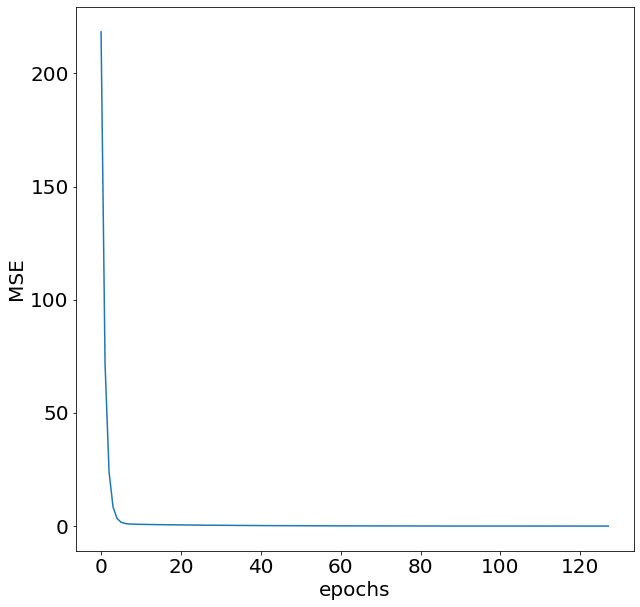

In [38]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

In [39]:
# строим предсказания
predictions = model.predict(x)

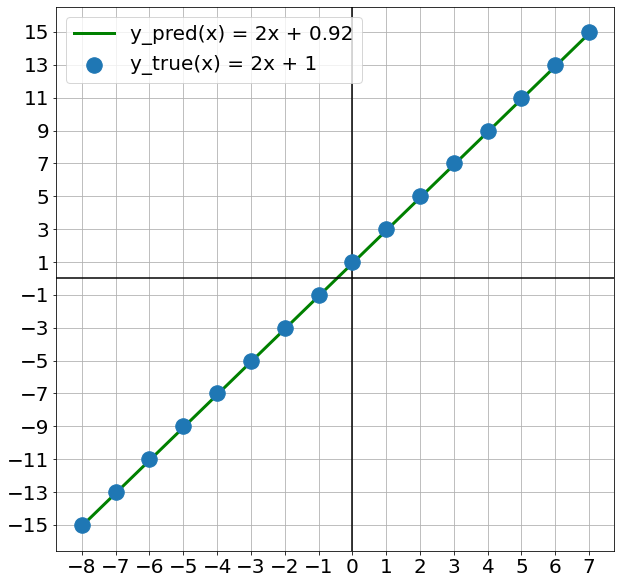

In [40]:
# и визуализируем их
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2x + 1')
plt.plot(x, predictions, lw=3, c='green', label=f'y_pred(x) = 2x + 0.92')
plt.xticks(x)
plt.yticks(y)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

In [41]:
w1, w2 = model.get_layer('dense_layer').get_weights()

w1 = w1[0, 0]
w2 = w2[0]

print(f'w1 = {w1:.2f}')
print(f'w2 = {w2:.2f}')

w1 = 2.00
w2 = 0.92


Исходное уравнение имело вид:

$$ \Large y_{true}(x) = 2.00x + 1.00 $$

А мы получили довольное близкое приближение исходного уравнения по 16 точкам:

$$ \Large y_{pred}(x) = 2.00x + 0.92 $$

#### Аппроксимация кривой

Проведём ровно ту же процедуру, что и выше, но в этот раз возьмём функцию посложнее:

$$ \Large y_{true}(x) = 2\sin(x) + 3$$

Возьмём 16 точек на кривой:

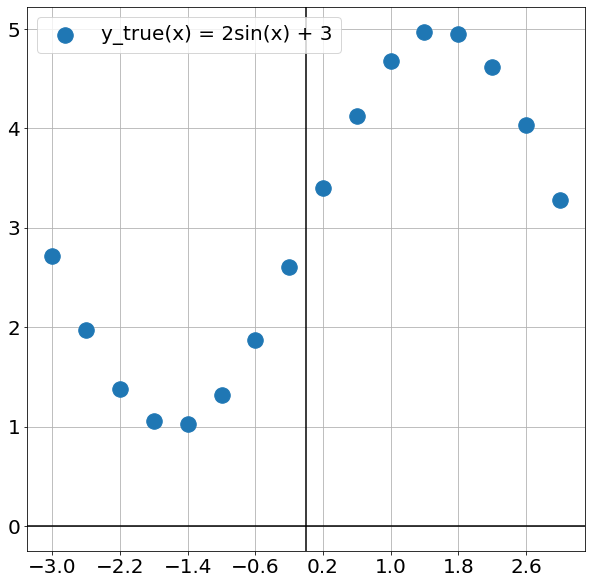

In [42]:
def some_sin_function(x):
    return 2 * np.sin(x) + 3

x = np.linspace(-3, 3, 16)
y = some_sin_function(x)

plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

In [43]:
# будем использовать ровно ту же самую модель
model = baseline_model()

history = model.fit(x=x, y=y, batch_size=16, epochs=128, verbose=1)

Epoch 1/128
1/1 [==============================] - 0s 84ms/step - loss: 22.5575 - mse: 22.5575
Epoch 2/128
1/1 [==============================] - 0s 918us/step - loss: 20.5273 - mse: 20.5273
Epoch 3/128
1/1 [==============================] - 0s 924us/step - loss: 18.7311 - mse: 18.7311
Epoch 4/128
1/1 [==============================] - 0s 813us/step - loss: 17.1394 - mse: 17.1394
Epoch 5/128
1/1 [==============================] - 0s 875us/step - loss: 15.7267 - mse: 15.7267
Epoch 6/128
1/1 [==============================] - 0s 1ms/step - loss: 14.4706 - mse: 14.4706
Epoch 7/128
1/1 [==============================] - 0s 1ms/step - loss: 13.3518 - mse: 13.3518
Epoch 8/128
1/1 [==============================] - 0s 1ms/step - loss: 12.3531 - mse: 12.3531
Epoch 9/128
1/1 [==============================] - 0s 1ms/step - loss: 11.4600 - mse: 11.4600
Epoch 10/128
1/1 [==============================] - 0s 1ms/step - loss: 10.6596 - mse: 10.6596
Epoch 11/128
1/1 [==============================] 

Text(0, 0.5, 'MSE')

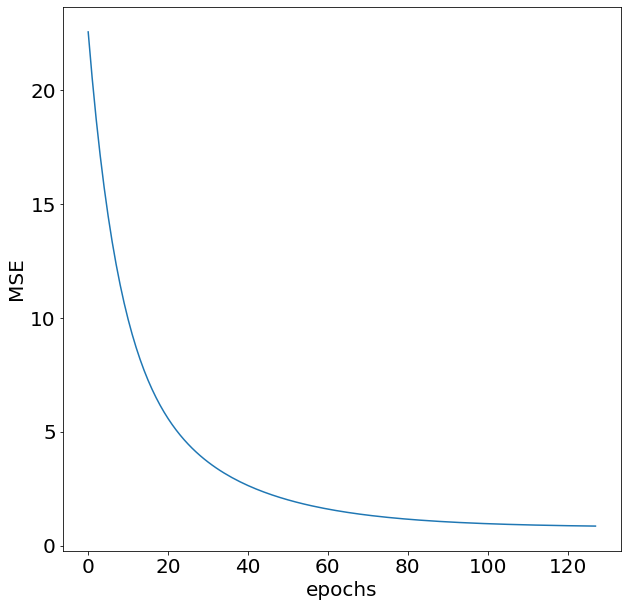

In [44]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

In [45]:
one_neuron_predictions = model.predict(x)

Визуализируем предсказания

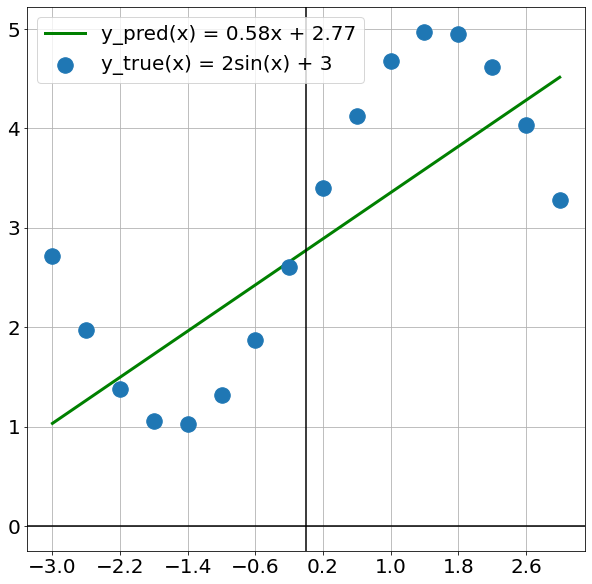

In [46]:
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.plot(x, one_neuron_predictions, lw=3, c='green', label=f'y_pred(x) = 0.58x + 2.77')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

In [47]:
w1, w2 = model.get_layer('dense_layer').get_weights()

w1 = w1[0, 0]
w2 = w2[0]

print(f'w1 = {w1:.2f}')
print(f'w2 = {w2:.2f}')

w1 = 0.58
w2 = 2.77


Уравнение исходной кривой:

$$ \Large y_{true}(x) = 2\sin(x) + 3$$

Наша линейная аппроксимация:

$$ \Large y_{pred}(x) = 0.58x + 2.77 $$

#### Усложнение базовой модели

Ранее скрытый слой сети состоял из одного нейрона. Добавим побольше нейронов, чтобы модель лучше "облегала" данные.

Схематично модель с несколькими нейронами на скрытом слое выглядит вот так:

![](https://miro.medium.com/max/3446/1*-IPQlOd46dlsutIbUq1Zcw.png)

Или так:

![](https://hsto.org/getpro/habr/post_images/604/876/9ed/6048769ed0d2db503ff74e3d616050d8.png)

In [48]:
def multiple_neurons_model(hidden_neurons: int):
    
    model = keras.models.Sequential()
    
    model.add(keras.layers.InputLayer(input_shape=(1, ), name='input_layer'))
    model.add(keras.layers.Dense(units=hidden_neurons, name='hidden_dense_layer'))
    model.add(keras.layers.Dense(units=1, name='output_dense_layer'))

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
        loss='mse',
        metrics=['mse']
    )
    
    return model

In [49]:
# построим модель с 3-мя нейронами в скрытом слое
model = multiple_neurons_model(hidden_neurons=3)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer (Dense)   (None, 3)                 6         
_________________________________________________________________
output_dense_layer (Dense)   (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


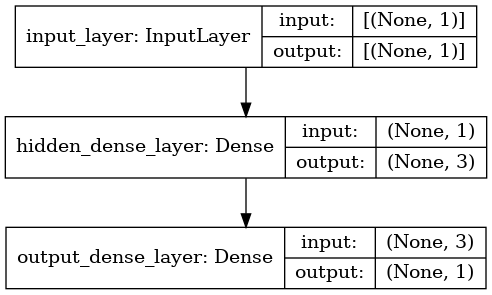

In [50]:
keras.utils.plot_model(model=model, show_shapes=True)

In [51]:
history = model.fit(x=x, y=y, batch_size=16, epochs=256, verbose=1)

Epoch 1/256
1/1 [==============================] - 0s 101ms/step - loss: 11.9507 - mse: 11.9507
Epoch 2/256
1/1 [==============================] - 0s 2ms/step - loss: 11.0797 - mse: 11.0797
Epoch 3/256
1/1 [==============================] - 0s 2ms/step - loss: 10.3073 - mse: 10.3073
Epoch 4/256
1/1 [==============================] - 0s 2ms/step - loss: 9.6082 - mse: 9.6082
Epoch 5/256
1/1 [==============================] - 0s 1ms/step - loss: 8.9654 - mse: 8.9654
Epoch 6/256
1/1 [==============================] - 0s 2ms/step - loss: 8.3672 - mse: 8.3672
Epoch 7/256
1/1 [==============================] - 0s 2ms/step - loss: 7.8059 - mse: 7.8059
Epoch 8/256
1/1 [==============================] - 0s 1ms/step - loss: 7.2759 - mse: 7.2759
Epoch 9/256
1/1 [==============================] - 0s 1ms/step - loss: 6.7738 - mse: 6.7738
Epoch 10/256
1/1 [==============================] - 0s 1ms/step - loss: 6.2973 - mse: 6.2973
Epoch 11/256
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 90/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 91/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 92/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 93/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 94/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 95/256
1/1 [==============================] - 0s 2ms/step - loss: 0.8168 - mse: 0.8168
Epoch 96/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 97/256
1/1 [==============================] - 0s 2ms/step - loss: 0.8168 - mse: 0.8168
Epoch 98/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - mse: 0.8168
Epoch 99/256
1/1 [==============================] - 0s 1ms/step - loss: 0.8168 - ms

Text(0, 0.5, 'MSE')

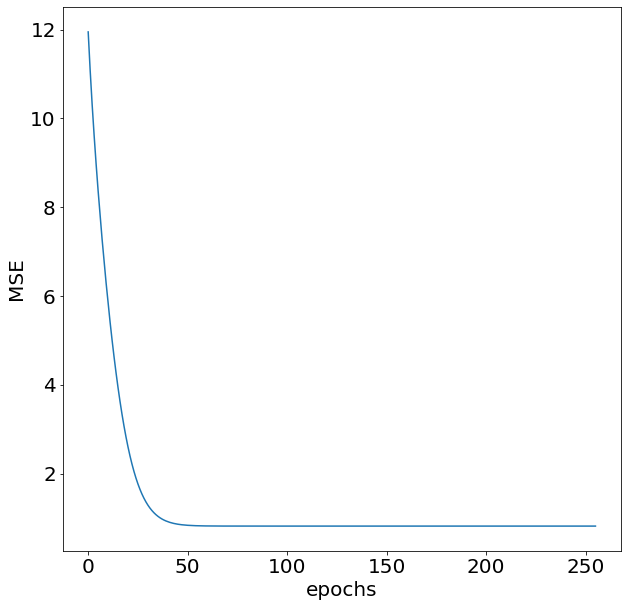

In [52]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

In [53]:
three_neurons_predictions = model.predict(x)

Визуализируем предсказания:

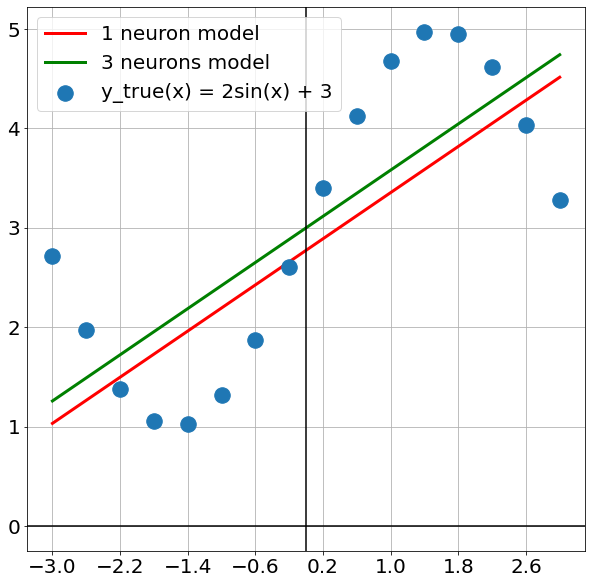

In [54]:
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.plot(x, one_neuron_predictions, lw=3, c='red', label='1 neuron model')
plt.plot(x, three_neurons_predictions, lw=3, c='green', label='3 neurons model')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

Несмотря на увеличившееся количество нейронов, мы получили ровно ту же самую прямую линию. То есть наша модель попрежнему линейная.

#### Почему так произошло?

![](./../pics/01_3_neurons_hidden_layer.png)

Модель состояла из трёх нейронов на скрытом слое и одного нейрона на выходе. Давайте это запишем:

$$ \Large neuron_0 = a_0x + b_0$$
$$$$
$$ \Large neuron_1 = a_1x + b_1$$
$$$$
$$ \Large neuron_2 = a_2x + b_2$$

$$ \Large neuron_{out} = a_{out}^0neuron_0 + a_{out}^1neuron_1 + a_{out}^2neuron_2 + b_{out} = $$

$$ \Large = a_{out}^0(a_0x + b_0) + a_{out}^1(a_1x + b_1) + a_{out}^2(a_2x + b_2) + b_{out} = $$

$$ \Large = a_{out}^0(a_0x + b_0) + \frac{b_{out}}{3} + a_{out}^1(a_1x + b_1) + \frac{b_{out}}{3} + a_{out}^2(a_2x + b_2) + \frac{b_{out}}{3} $$

Видно, что мы получили уравнение линейной функции. То есть линейная комбинация линейных функций есть линейная функция.

Интерпретация попроще:

$$ \large 5\cdot10\cdot2 = 100 $$
$$ \large 5\cdot20 = 100 $$

Любое выражение, состоящее двух умножений, можно переписать в форме с одним умножением. Вывод: для любой трёхслойной сети существует двухслойная сеть с идентичным поведением. Последовательное вычисление двух взвешенных сумм - это всего лишь более дорогая версия вычисления одной взвешенной суммы.

Визуализиурем прямые линии скрытых слоёв:

In [55]:
def line(x, i):
    hidden_layer_neurons = model.get_layer('hidden_dense_layer').units
    
    hidden_weights = model.get_layer('hidden_dense_layer').get_weights()
    a_hid = hidden_weights[0][0, i]
    b_hid = hidden_weights[1][i]
    
    output_weights = model.get_layer('output_dense_layer').get_weights()
    a_out = output_weights[0][i, 0]
    b_out = output_weights[1][0]
    
    return a_out * (a_hid * x + b_hid) + b_out / hidden_layer_neurons

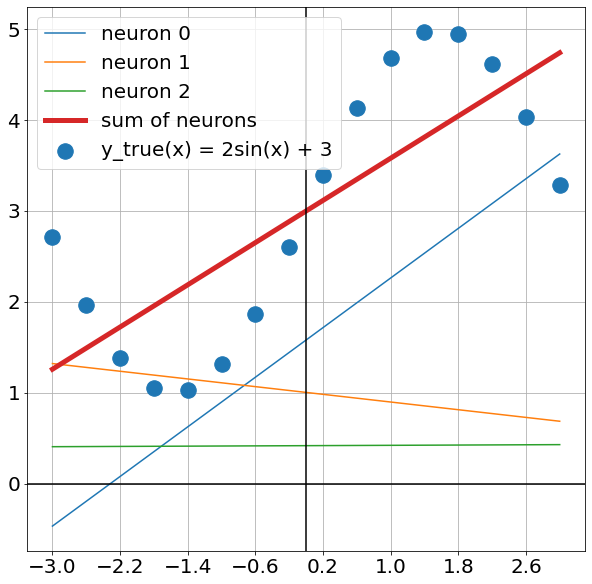

In [56]:
for i in range(model.get_layer('hidden_dense_layer').units):
    plt.plot(x, line(x, i), label=f'neuron {i}')
    
plt.plot(x, line(x, 0) + line(x, 1) + line(x, 2), lw=5, label='sum of neurons')
    
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')    

Красная линия - это взвешенная сумма трёх прямых линий с предыдущего слоя.

#### Добавим функцию активации

Перед тем, как подавать взвешенную сумму следующему слою, обёрнём её в функцию активации:

![](https://miro.medium.com/max/1170/1*abHGVMc8bTFVFSvB6ZYaBg.png)

В качестве функции активации возьмём Relu.

$$ \Large Relu = max(0, x)$$

![](https://miro.medium.com/max/1026/0*g9ypL5M3k-f7EW85.png)

In [57]:
def multiple_neurons_model_with_activation(hidden_neurons: int, activation: str):   
    model = keras.models.Sequential()
    
    model.add(keras.layers.InputLayer(input_shape=(1, ), name='input_layer'))
    model.add(keras.layers.Dense(units=hidden_neurons, activation=activation, name='hidden_dense_layer'))
    model.add(keras.layers.Dense(units=1, name='output_dense_layer'))

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
        loss='mse',
        metrics=['mse']
    )
    
    return model

In [58]:
model = multiple_neurons_model_with_activation(3, 'relu')

history = model.fit(x=x, y=y, batch_size=16, epochs=256, verbose=1)

Epoch 1/256
1/1 [==============================] - 0s 101ms/step - loss: 10.8971 - mse: 10.8971
Epoch 2/256
1/1 [==============================] - 0s 1ms/step - loss: 10.3768 - mse: 10.3768
Epoch 3/256
1/1 [==============================] - 0s 1ms/step - loss: 9.9182 - mse: 9.9182
Epoch 4/256
1/1 [==============================] - 0s 1ms/step - loss: 9.5114 - mse: 9.5114
Epoch 5/256
1/1 [==============================] - 0s 2ms/step - loss: 9.1485 - mse: 9.1485
Epoch 6/256
1/1 [==============================] - 0s 1ms/step - loss: 8.8230 - mse: 8.8230
Epoch 7/256
1/1 [==============================] - 0s 1ms/step - loss: 8.5293 - mse: 8.5293
Epoch 8/256
1/1 [==============================] - 0s 1ms/step - loss: 8.2628 - mse: 8.2628
Epoch 9/256
1/1 [==============================] - 0s 1ms/step - loss: 8.0196 - mse: 8.0196
Epoch 10/256
1/1 [==============================] - 0s 1ms/step - loss: 7.7963 - mse: 7.7963
Epoch 11/256
1/1 [==============================] - 0s 1ms/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 2.1263 - mse: 2.1263
Epoch 90/256
1/1 [==============================] - 0s 1ms/step - loss: 2.1012 - mse: 2.1012
Epoch 91/256
1/1 [==============================] - 0s 1ms/step - loss: 2.0766 - mse: 2.0766
Epoch 92/256
1/1 [==============================] - 0s 1ms/step - loss: 2.0524 - mse: 2.0524
Epoch 93/256
1/1 [==============================] - 0s 2ms/step - loss: 2.0288 - mse: 2.0288
Epoch 94/256
1/1 [==============================] - 0s 1ms/step - loss: 2.0056 - mse: 2.0056
Epoch 95/256
1/1 [==============================] - 0s 2ms/step - loss: 1.9829 - mse: 1.9829
Epoch 96/256
1/1 [==============================] - 0s 1ms/step - loss: 1.9607 - mse: 1.9607
Epoch 97/256
1/1 [==============================] - 0s 1ms/step - loss: 1.9389 - mse: 1.9389
Epoch 98/256
1/1 [==============================] - 0s 1ms/step - loss: 1.9176 - mse: 1.9176
Epoch 99/256
1/1 [==============================] - 0s 1ms/step - loss: 1.8966 - ms

Text(0, 0.5, 'MSE')

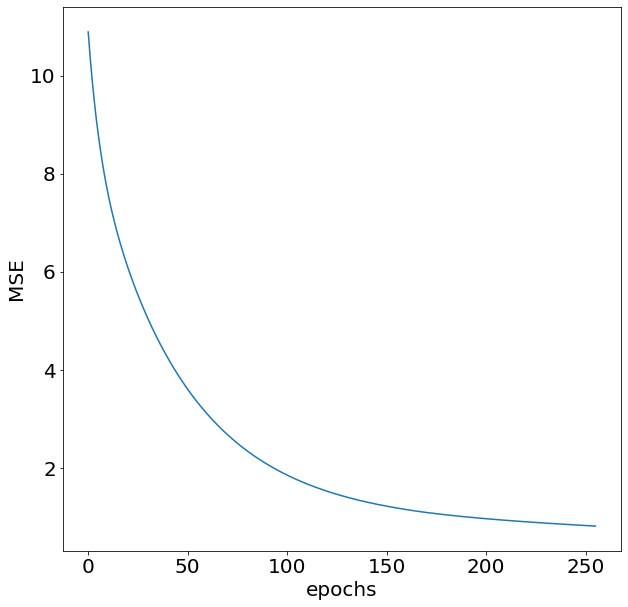

In [59]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

Визуализируем с предсказания с функцией активации:

In [60]:
three_neurons_with_activation_predictions = model.predict(x)

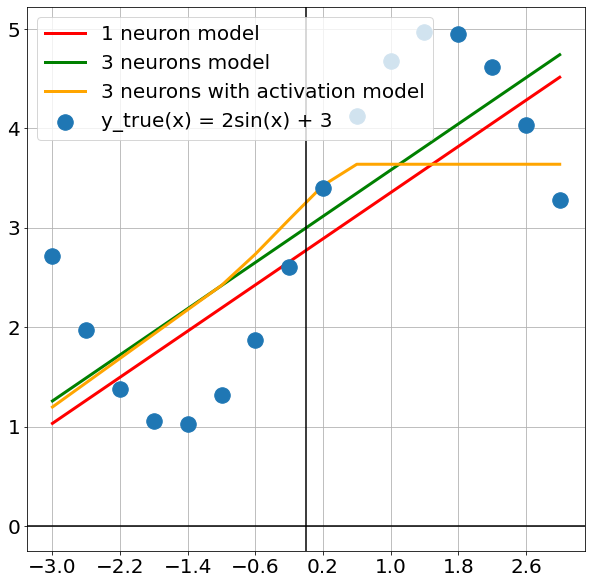

In [61]:
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.plot(x, one_neuron_predictions, lw=3, c='red', label='1 neuron model')
plt.plot(x, three_neurons_predictions, lw=3, c='green', label='3 neurons model')
plt.plot(x, three_neurons_with_activation_predictions, lw=3, c='orange', label='3 neurons with activation model')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')

Ура! У наших предсказаний появился изгиб! Именно такого поведения мы и добивались.

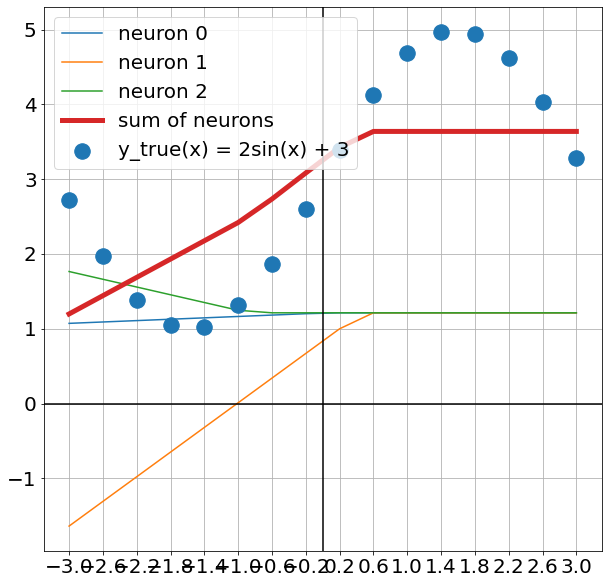

In [62]:
def relu(x, i):
    hidden_layer_neurons = model.get_layer('hidden_dense_layer').units
    
    hidden_weights = model.get_layer('hidden_dense_layer').get_weights()
    a_hid = hidden_weights[0][0, i]
    b_hid = hidden_weights[1][i]
    
    output_weights = model.get_layer('output_dense_layer').get_weights()
    a_out = output_weights[0][i, 0]
    b_out = output_weights[1][0]
    
    return a_out * (a_hid * x + b_hid).clip(min=0) + b_out / hidden_layer_neurons

for i in range(model.get_layer('hidden_dense_layer').units):
    plt.plot(x, relu(x, i), label=f'neuron {i}')
    
plt.plot(x, relu(x, 0) + relu(x, 1) + relu(x, 2), lw=5, label='sum of neurons')
    
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.xticks(x)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')    

Вот так может выглядить аппроксимация (розовая кривая) сложной функции (чёрная кривая) с помощью нейронной сети, состоящей из 8 нейронов и гиперболической функции активации.

![](https://hsto.org/files/3ff/adf/820/3ffadf8206fa4e4fbd44caadd4a763f5)

Популярные функции активации:

![](https://www.machinelearningmastery.ru/img/0-399867-614444.png)

Функции активации должны удовлетворять следующим требованиям:
- непрерывной и бесконечной на всей области определения
- монотонной и никогда не должна менять направление
- нелинейной, то есть иметь точку перегиба
- с низкой вычислительной сложностью

[Функции активации WIKI](https://en.wikipedia.org/wiki/Activation_function)

#### overhead

Используем на скрытом слое 512 нейронов.

In [63]:
model = multiple_neurons_model_with_activation(512, 'relu')

history = model.fit(x=x, y=y, batch_size=16, epochs=256, verbose=1)

Epoch 1/256
1/1 [==============================] - 0s 95ms/step - loss: 11.0904 - mse: 11.0904
Epoch 2/256
1/1 [==============================] - 0s 1ms/step - loss: 9.5537 - mse: 9.5537
Epoch 3/256
1/1 [==============================] - 0s 1ms/step - loss: 8.2764 - mse: 8.2764
Epoch 4/256
1/1 [==============================] - 0s 1ms/step - loss: 7.1972 - mse: 7.1972
Epoch 5/256
1/1 [==============================] - 0s 1ms/step - loss: 6.2766 - mse: 6.2766
Epoch 6/256
1/1 [==============================] - 0s 1ms/step - loss: 5.4878 - mse: 5.4878
Epoch 7/256
1/1 [==============================] - 0s 1ms/step - loss: 4.8104 - mse: 4.8104
Epoch 8/256
1/1 [==============================] - 0s 1ms/step - loss: 4.2300 - mse: 4.2300
Epoch 9/256
1/1 [==============================] - 0s 1ms/step - loss: 3.7358 - mse: 3.7358
Epoch 10/256
1/1 [==============================] - 0s 1ms/step - loss: 3.3188 - mse: 3.3188
Epoch 11/256
1/1 [==============================] - 0s 1ms/step - loss: 2.96

1/1 [==============================] - 0s 1ms/step - loss: 0.5664 - mse: 0.5664
Epoch 177/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5652 - mse: 0.5652
Epoch 178/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5640 - mse: 0.5640
Epoch 179/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5627 - mse: 0.5627
Epoch 180/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5615 - mse: 0.5615
Epoch 181/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5603 - mse: 0.5603
Epoch 182/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5591 - mse: 0.5591
Epoch 183/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5578 - mse: 0.5578
Epoch 184/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5566 - mse: 0.5566
Epoch 185/256
1/1 [==============================] - 0s 1ms/step - loss: 0.5554 - mse: 0.5554
Epoch 186/256
1/1 [==============================] - 0s 1ms/step - loss: 0

Text(0, 0.5, 'MSE')

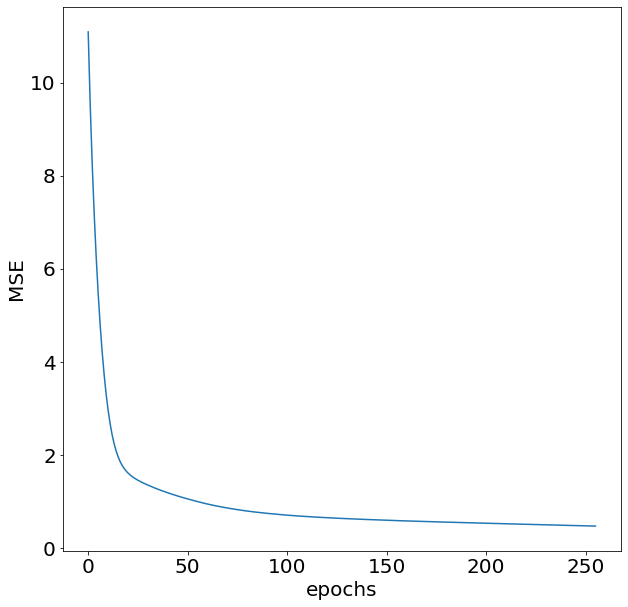

In [64]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('MSE')

In [65]:
overhead_neurons_with_activation_predictions = model.predict(x)

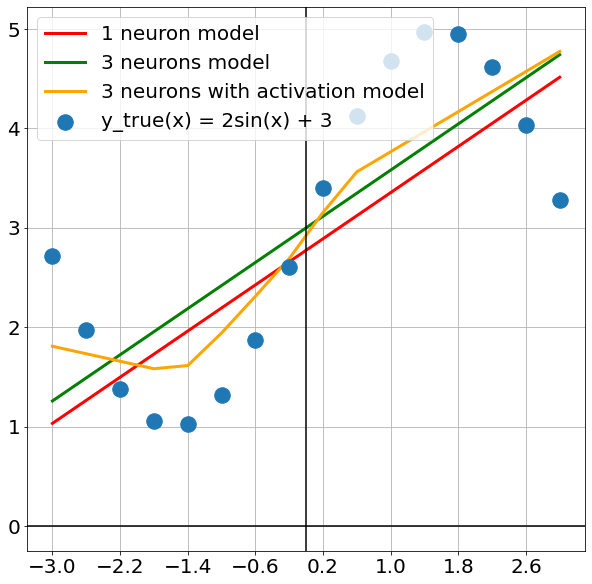

In [66]:
plt.scatter(x, y, s=20*4*3, zorder=3, label=f'y_true(x) = 2sin(x) + 3')
plt.plot(x, one_neuron_predictions, lw=3, c='red', label='1 neuron model')
plt.plot(x, three_neurons_predictions, lw=3, c='green', label='3 neurons model')
plt.plot(x, overhead_neurons_with_activation_predictions, lw=3, c='orange', label='3 neurons with activation model')
plt.xticks(x[::2])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='upper left')